Fitted parameters: Kxx = 148.3688, Kyy = 306.4757, Kzz = -0.0509, Kxy = -309.6740, Kyz = 26.6384, Kxz = -30.8715


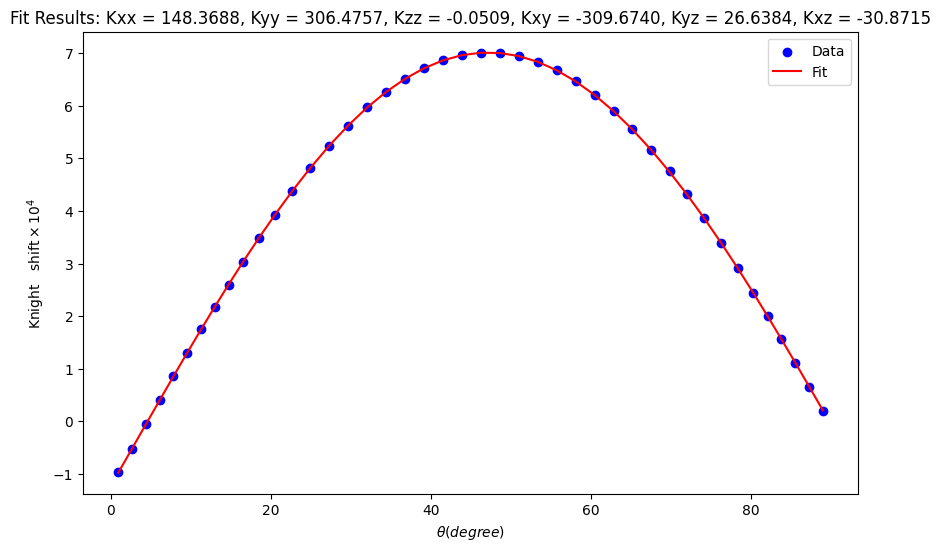

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# データの読み込み
dataset = pd.read_csv('Te(xyver3).csv')
x = dataset['x']  # 角度（ラジアン単位で与えられていると仮定）
y = dataset['y']  # 対応する値

# フィッティング関数の定義
def model_func(x, Kxx, Kyy, Kzz, Kxy, Kyz, Kxz):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    return C*(0.25*C*Kxx + 0.866025403784439*C*Kxy + 0.75*C*Kyy + 0.5*Kxz*S + 0.866025403784439*Kyz*S) - S*(-0.5*C*Kxz - 0.866025403784439*C*Kyz - Kzz*S)

# 初期推定値の設定
initial_guess = [1, 1, 1, 1, 1, 1]  # 変数の初期値

# データにフィット
popt, pcov = curve_fit(model_func, x, y, p0=initial_guess)

# フィッティング結果のパラメータを取得
Kxx, Kyy, Kzz, Kxy, Kyz, Kxz = popt
print(f"Fitted parameters: Kxx = {Kxx:.4f}, Kyy = {Kyy:.4f}, Kzz = {Kzz:.4f}, Kxy = {Kxy:.4f}, Kyz = {Kyz:.4f}, Kxz = {Kxz:.4f}")

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, model_func(x, *popt), label='Fit', color='red')
plt.xlabel(r'$\theta (degree)$')
plt.ylabel(r'$\mathrm{Knight}\quad\mathrm{shift}\times 10^4$')
plt.legend()
plt.title(f'Fit Results: Kxx = {Kxx:.4f}, Kyy = {Kyy:.4f}, Kzz = {Kzz:.4f}, Kxy = {Kxy:.4f}, Kyz = {Kyz:.4f}, Kxz = {Kxz:.4f}')
plt.show()